In [1]:
# First, import everything necessary

import numpy as np                         # For matrix operations and numerical processing
import os                                  # For manipulating filepath names
import simplejson as json                  # For writing outputs to notebook
import sys                                 # For writing outputs to notebook
import torch                               # For tensor computations
import yaml                                # For settings loading
from IPython.display import Markdown as md # For displaying markdown in the notebook

# Set presentation settings
%matplotlib inline
import matplotlib                          # For charts and visualizations
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import SymLogNorm
with open('../plots/palette.json') as json_file:
    color_palette = json.load(json_file)
plt.style.use('../plots/ssdjet.mplstyle')

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from utils import get_data_loader          # For loading data

In [2]:
# Load configuration

CONFIG_FILE = '../ssd-config.yml'
config = yaml.safe_load(open(CONFIG_FILE))
ssd_settings = config['ssd_settings']

In [3]:
# Gather training data

targets_train = np.empty((0, 6))
for dataset_path in config['dataset']['train']:
    loader = get_data_loader(dataset_path,
                             1,
                             0,
                             ssd_settings['input_dimensions'],
                             ssd_settings['object_size'],
                             return_pt=True,
                             raw=True,
                             shuffle=False)

    for _, target in iter(loader):
        for t in target:
            targets_train = np.vstack((targets_train, t.cpu()))

In [4]:
# Gather validation data

targets_validation = np.empty((0, 6))
for dataset_path in config['dataset']['validation']:
    loader = get_data_loader(dataset_path,
                             1,
                             0,
                             ssd_settings['input_dimensions'],
                             ssd_settings['object_size'],
                             return_pt=True,
                             raw=True,
                             shuffle=False)

    for _, target in iter(loader):
        for t in target:
            targets_validation = np.vstack((targets_validation, t.cpu()))

In [5]:
# Gather test data

targets_test = np.empty((0, 6))
for dataset_path in config['dataset']['test']:
    loader = get_data_loader(dataset_path,
                             1,
                             0,
                             ssd_settings['input_dimensions'],
                             ssd_settings['object_size'],
                             return_pt=True,
                             raw=True,
                             shuffle=False)

    for _, target in iter(loader):
        for t in target:
            targets_test = np.vstack((targets_test, t.cpu()))

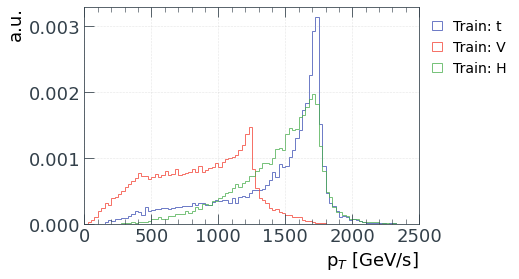

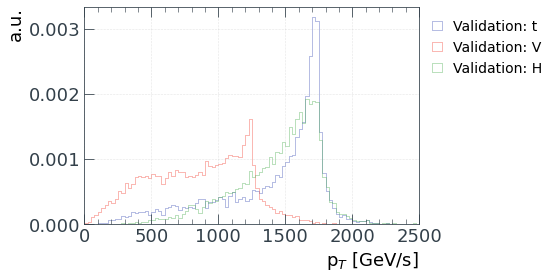

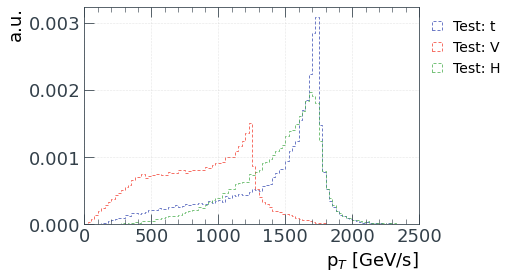

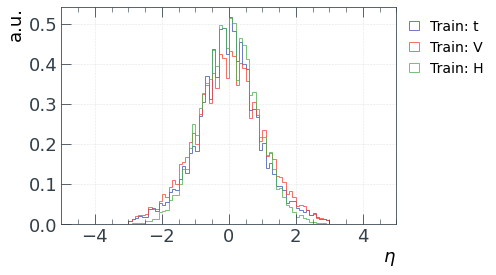

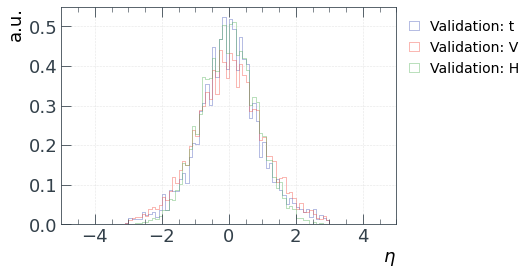

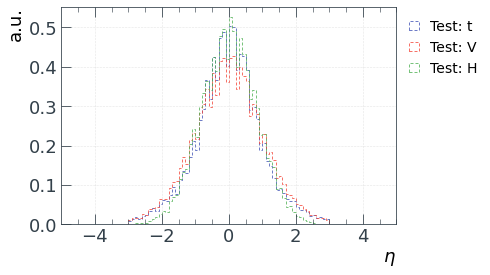

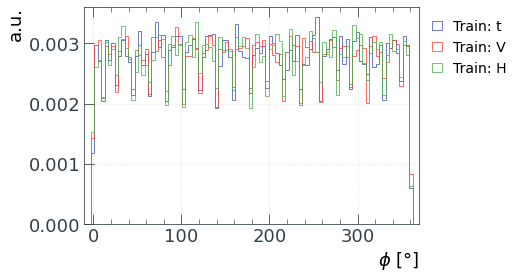

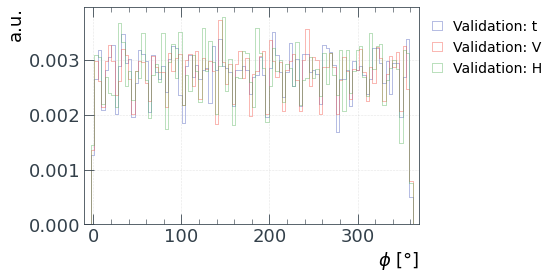

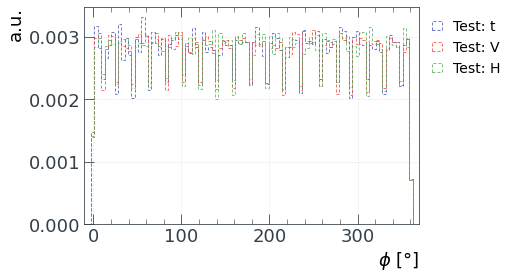

In [7]:
colors = ['indigo', 'red', 'green']
labels = ['Train', 'Validation', 'Test']
styles = [(0, ()), (0, (1, 1)), (0, (3, 2))]
nbins = 100

for index, label, (bin_min, bin_max), multiplier, subtrahend, offset, name in [(-1, 'p$_T$ [GeV/s]', (0, 2500), 1, 0, 0, 'pt'),
                                                                               (0, '$\eta$', (-5, 5), 6, 3, 23./340, 'eta'),
                                                                               (1, '$\phi$ [$\degree$]', (-10, 370), 360, 0, 23./360, 'phi')]:
    binning = np.arange(bin_min, bin_max, (bin_max-bin_min) / nbins)
    for i, targets in enumerate([targets_train, targets_validation, targets_test]):
        fig = plt.figure()
        for j, jet in enumerate(config['evaluation_pref']['names_classes']):
            values = targets[targets[:, -2] == (j + 1)][:, index]
            values = (values + offset) * multiplier - subtrahend

            plt.hist(values,
                     density=True,
                     facecolor=None,
                     bins=binning,
                     label='{}: {}'.format(labels[i], jet),
                     histtype='step',
                     ls=styles[i],
                     edgecolor=color_palette[colors[j]]['shade_500'],
                     alpha=0.75)

        plt.xlabel(label, horizontalalignment='right', x=1.0)
        plt.ylabel("a.u.", horizontalalignment='right', y=1.0)
        plt.legend(bbox_to_anchor=(1, 1))
        plt.xlim(bin_min, bin_max)
        plt.grid(True)
        fig.savefig('../plots/dataset-profile-{0}-{1}'.format(name, labels[i]))
        plt.show();

In [8]:
count = np.zeros((3, 3))
labels = ['Train', 'Validation', 'Test']
for i, targets in enumerate([targets_train, targets_validation, targets_test]):
    for j, jet in enumerate(config['evaluation_pref']['names_classes']):
        x = targets[targets[:, -2] == (j + 1)]
        count[j, i] = len(x)

md('''| | Train | Validation | Test |
| --- | --- | --- | --- |
| t | {} | {} | {} |
| V | {} | {} | {} |
| H | {} | {} | {} |'''.format(*list(count.flatten())))

| | Train | Validation | Test |
| --- | --- | --- | --- |
| t | 59388.0 | 23802.0 | 59392.0 |
| V | 118701.0 | 47493.0 | 118832.0 |
| H | 59967.0 | 23997.0 | 59978.0 |